In [1]:
import numpy as np
import pandas as pd
from matplotlib.ticker import MaxNLocator
import scipy.stats as sts
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.linalg

plt.style.use('seaborn-v0_8-pastel')

In [2]:
df = pd.read_csv('data_optimized.csv')

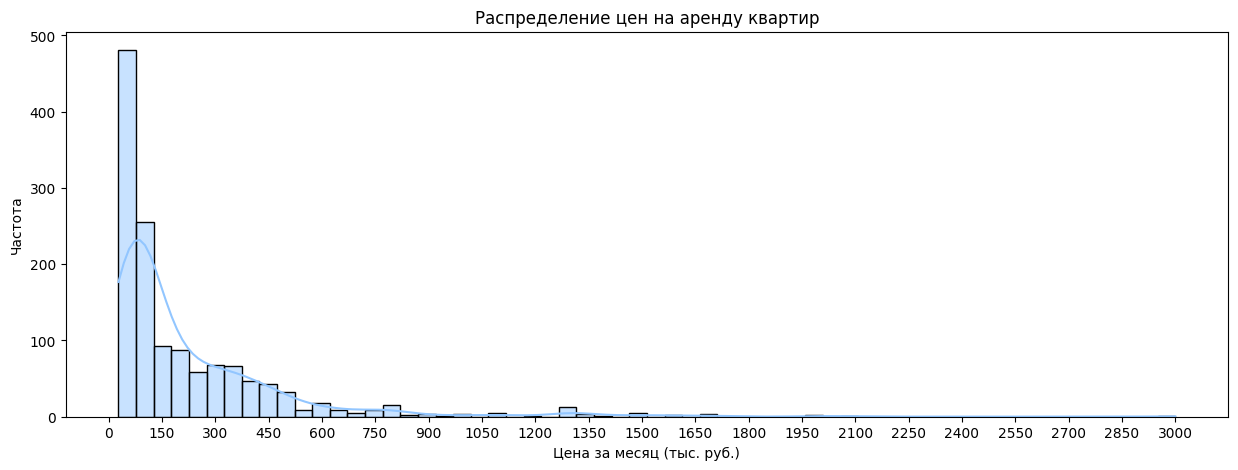

In [3]:
plt.figure(figsize=(15, 5))
sns.histplot(df['price_per_month'] / 1000, bins=60, kde=True)
plt.title('Распределение цен на аренду квартир')
plt.xlabel('Цена за месяц (тыс. руб.)')
plt.ylabel('Частота')
plt.gca().xaxis.set_major_locator(MaxNLocator(nbins=32))
plt.show()

Как видно из графика, значительная часть квартир сдаётся по цене ниже 150к рублей. Но при этом, встречаются и запредельные значения - максимумом является 3 миллиона :)

In [4]:
df.price_per_month.max()

np.int64(3000000)

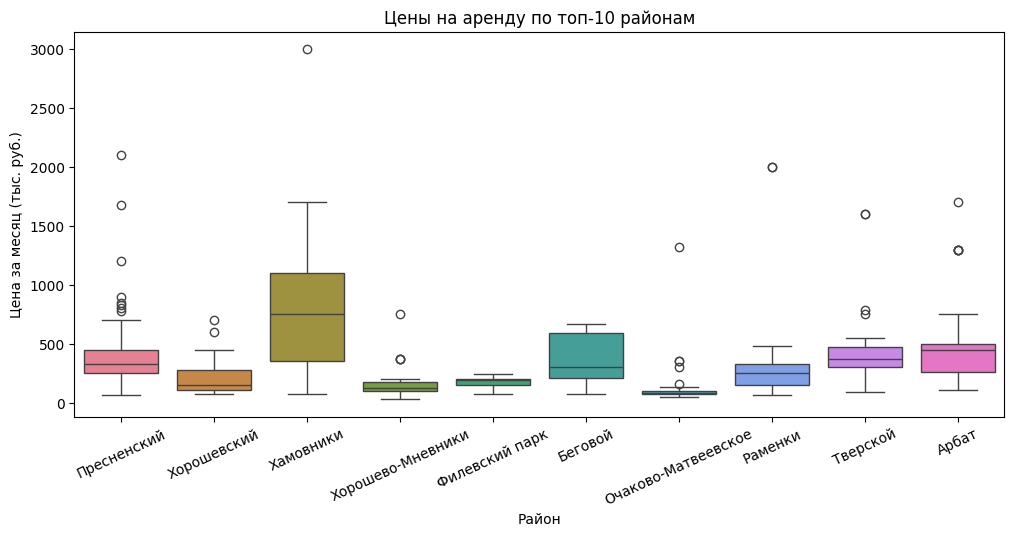

In [5]:
top_districts = df['district'].value_counts().nlargest(10).index
df_top_districts = df[df['district'].isin(top_districts)]

plt.figure(figsize=(12, 5))
sns.boxplot(x='district', y=df_top_districts.price_per_month / 1000, data=df_top_districts, hue='district')
plt.title('Цены на аренду по топ-10 районам')
plt.xlabel('Район')
plt.ylabel('Цена за месяц (тыс. руб.)')
plt.xticks(rotation=25)
plt.ticklabel_format(style='plain', axis='y')
plt.show()

Как видно из графика, в Хамовниках наблюдается наибольший межквартильный размах: квартили расположены на уровне 500к и 1млн рублей. В других районах цены в среднем меньше.

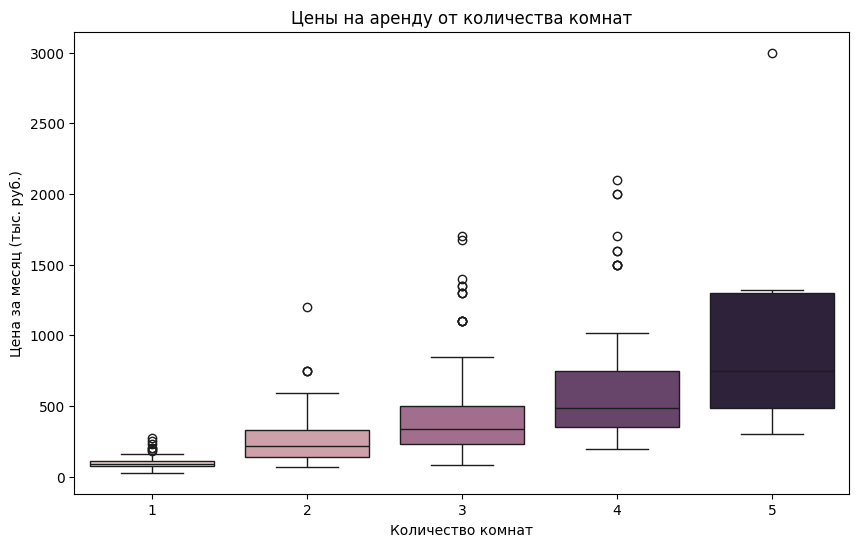

In [6]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='rooms_count', y=df_top_districts.price_per_month / 1000, data=df, hue='rooms_count', legend=False)
plt.title('Цены на аренду от количества комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Цена за месяц (тыс. руб.)')
plt.show()

Как и следовало ожидать, количество комнат прямо влияет на цену за месяц: крайние нижние значения увеличиваются при увеличении числа комнат.

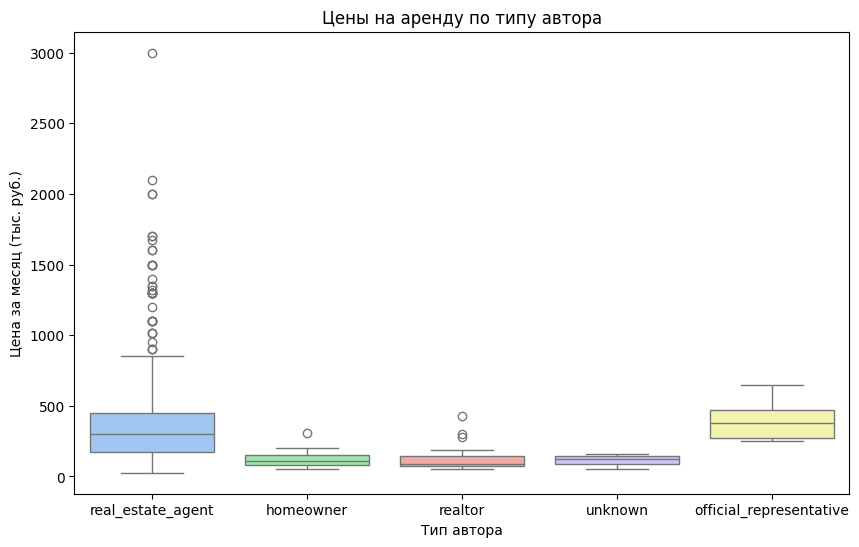

In [7]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='author_type', y=df_top_districts.price_per_month / 1000, data=df, hue='author_type', legend=False)
plt.title('Цены на аренду по типу автора')
plt.xlabel('Тип автора')
plt.ylabel('Цена за месяц (тыс. руб.)')
plt.show()

Удивительно, но тип автора объявления не сильно влияет на цену, не считая официальных представителей: скорее всего это связано с тем, что нет необходимости прибегать к их услугам для сделок с низкими ценами.